# Exploratory Analysis

In [2]:
import pandas as pd
import sqlite3

conn = sqlite3.connect(r"C:\Users\adama\Desktop\PROJECTS\Project_1_superstore\DB\superstore.db")
cursor = conn.cursor()

superstore = r"C:\Users\adama\Desktop\PROJECTS\Project_1_superstore\Data Source\superstoreproject.csv"
df = pd.read_csv(superstore, sep=";", encoding="latin1")

def rename_columns(column_list):
    new_columns ={}
    for i in column_list:
        new_value = i.lower().replace(' ' ,'_').replace('-' , '_')
        new_columns[i] = new_value
    return new_columns

new_columns = rename_columns(df.columns)
        
df.rename(columns=new_columns, inplace=True)

## Create Table

In [ ]:
cursor.execute('''
    create table sales_raw (
        'Row_ID' int primary key ,
        'Order_ID' string ,
        'Order_Date' string ,
        'Ship_Date' string ,
        'Ship_Mode' string ,
        'Customer_ID' string ,
        'Customer_Name' string ,
        'Segment' string ,
        'County' string ,
        'City' string ,
        'State' string ,
        'Postal_Code' string ,
        'Region' string ,
        'Product_ID' string ,
        'Category' string ,
        'Subcategory' string ,
        'Product_Name' string ,
        'Sales' string,
        'Quantity' int ,
        'Discount' string ,
        'Profit' string
        )
        '''.lower())

## Write Data Frame to SQLite

In [3]:
df.to_sql(name='sales_raw' , con=conn , if_exists='replace', index=False)

## Top Ten Customer by Sales

In [3]:
pd.read_sql(sql=
            '''SELECT customer_name, SUM(sales) as sum_sales 
            FROM sales_raw 
            GROUP BY customer_name
            ORDER BY sum_sales DESC;
            ''', con=conn).head(10),

(        customer_name  sum_sales
 0         Sean Miller    25035.0
 1        Tamara Chand    19046.0
 2        Raymond Buch    15107.0
 3        Tom Ashbrook    14589.0
 4       Adrian Barton    14460.0
 5        Ken Lonsdale    14157.0
 6        Sanjit Chand    14127.0
 7        Hunter Lopez    12865.0
 8        Sanjit Engle    12198.0
 9  Christopher Conant    12122.0,)

## Top Twenty Customer by Sales in Percentage

In [4]:
pd.read_sql(sql=
            '''WITH sum_sales AS
            ( SELECT SUM(sales) AS sum_sales
            FROM sales_raw )
            SELECT customer_name,
            ROUND (SUM(sales) / sum_sales.sum_sales * 100, 2) AS percentage
            FROM sales_raw,
            sum_sales
            GROUP BY customer_name
            ORDER BY percentage DESC
            LIMIT 20
            ''', con=conn)

,customer_name,percentage
0,Sean Miller,1.09
1,Tamara Chand,0.83
2,Raymond Buch,0.66
3,Tom Ashbrook,0.64
4,Adrian Barton,0.63
5,Sanjit Chand,0.62
6,Ken Lonsdale,0.62
7,Hunter Lopez,0.56
8,Sanjit Engle,0.53
9,Christopher Conant,0.53


## Top Ten State by Profit

In [6]:
sum_profit_df = pd.read_sql(sql=
            '''
            SELECT state, (SUM(profit)) AS sum_profit
            FROM sales_raw 
            GROUP BY state 
            ORDER BY sum_profit DESC
            LIMIT 10
            ''', con=conn)

sum_profit_df = sum_profit_df.astype({"sum_profit": "int"})

sum_profit_df["sum_profit_dollar"] = sum_profit_df["sum_profit"].astype("string").apply(lambda x: x.split(".")[0] + "$")

sum_profit_df[["state", "sum_profit_dollar"]]

,state,sum_profit_dollar
0,California,75466$
1,New York,73506$
2,Washington,33160$
3,Michigan,24334$
4,Virginia,18488$
5,Indiana,18310$
6,Georgia,16153$
7,Kentucky,11128$
8,Minnesota,10772$
9,Delaware,9927$


<AxesSubplot:ylabel='sum_profit'>

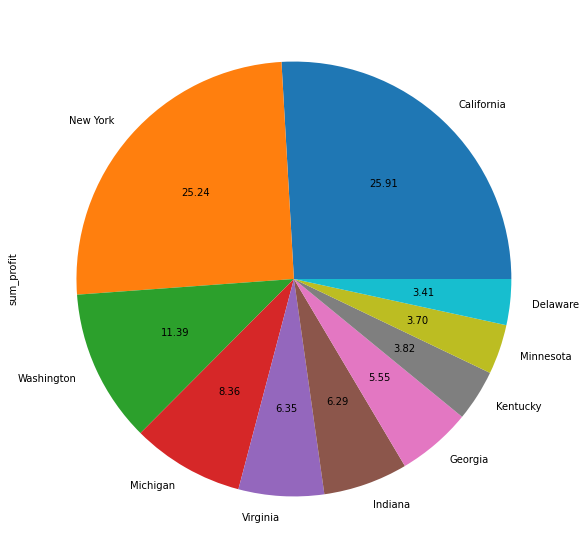

In [14]:
sum_profit_df.set_index("state")["sum_profit"].plot(kind="pie", figsize=(10,10), autopct='%.2f')

In [30]:
template = "asd{y} {x:.2f}"
template.format(x=25, y="szoveg")

'asdszoveg 25.00'

## Top Ten State by Sales

In [8]:
sum_sales_df = pd.read_sql(sql=
'''
WITH top_states AS (
    SELECT state
    FROM sales_raw
    GROUP BY state
    ORDER BY SUM(sales)
    DESC LIMIT 10
)
SELECT 
    IFNULL(t.state, 'Other') AS state,
    SUM(r.sales) AS sum_sales
FROM sales_raw r
LEFT JOIN top_states t ON (t.state = r.state)
GROUP BY t.state
ORDER BY sum_sales DESC
''', con=conn)

sum_sales_df = sum_sales_df.astype({"sum_sales": "int"})

sum_sales_df["sum_sales_dollar"] = sum_sales_df["sum_sales"].astype("string").apply(lambda x: x.split(".")[0] + "$")

sum_sales_df[["state", "sum_sales_dollar"]]

,state,sum_sales_dollar
0,Other,706714$
1,California,456493$
2,New York,310178$
3,Texas,169646$
4,Washington,138332$
5,Pennsylvania,116181$
6,Florida,89262$
7,Illinois,79901$
8,Ohio,77998$
9,Michigan,76099$


<AxesSubplot:ylabel='sum_sales'>

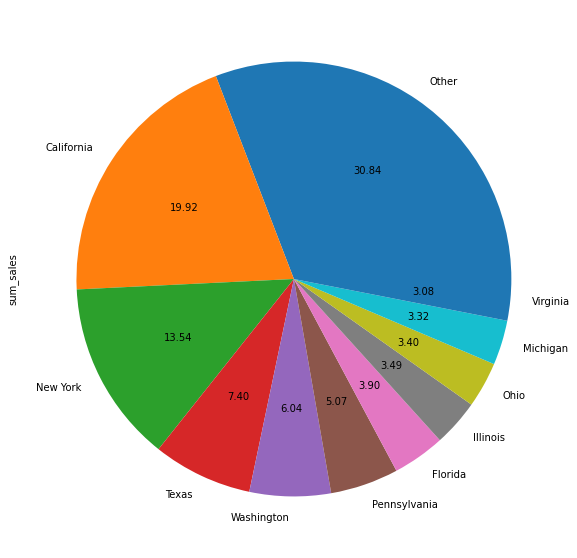

In [46]:
sum_sales_all = sum_sales_df["sum_sales"]

sum_sales_df.set_index("state")["sum_sales"].plot(kind="pie", figsize=(10,10), autopct='%.2f')